In [31]:
#true_labels
true_labels = []
emotion_classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

for emotion in emotion_classes:
    for n in range(100):
        true_labels.append(emotion)

In [32]:
true_labels

['Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',


In [33]:
# aws rekognition api call
import boto3

def aws_rekognition_api(filepath):
    #initialize rekogniton client
    rekognition = boto3.client('rekognition')

    #invoke aws rekognition api
    with open(filepath, 'rb') as image_data:
        response_content = image_data.read()
        rekognition_response = rekognition.detect_faces(Image={'Bytes':response_content}, Attributes=['ALL'])  
    
    #remove confused class
    try:
        model_reponse_type_output = []
        for class_type in rekognition_response['FaceDetails'][0]['Emotions']:
            if class_type['Type'] != 'CONFUSED':
                model_reponse_type_output.append(class_type)
    except IndexError:
        return 'Neutral'

    #extract highest confidence emotion
    predicted_type = ''
    confidence_value = 0
    for emotion in model_reponse_type_output:
        if confidence_value <= emotion['Confidence']:
            confidence_value = emotion['Confidence']
            predicted_type = emotion['Type']

    #convert response data similar to other models
    if(predicted_type == 'CALM'):
        predicted_type = 'NEUTRAL'
    elif(predicted_type == 'DISGUSTED'):
        predicted_type = 'DISGUST'
    elif(predicted_type == 'SURPRISED'):
        predicted_type = 'SURPRISE'
        
    predicted_type = predicted_type.capitalize()
    return predicted_type

In [34]:
import os

root_path = '/Users/nvvankad/Documents/Personal/Masters/CSCE 5214 - Software Development for AI/P3 Project/test_data'
folders = ['0Angry', '1Disgust', '2Fear', '3Happy', '4Sad', '5Surprise', '6Neutral']
predicted_labels = []

for folder in folders:
    for currentpath, folders, files in os.walk(os.path.join(root_path, folder)):
        for file in files:
            file_path = os.path.join(currentpath, file)
            if '.DS_Store' in file_path:
                continue
            predicted_labels.append(aws_rekognition_api(file_path))

In [35]:
# print last file
file_path

'/Users/nvvankad/Documents/Personal/Masters/CSCE 5214 - Software Development for AI/P3 Project/test_data/6Neutral/img_35.jpg'

In [36]:
predicted_labels

['Angry',
 'Angry',
 'Fear',
 'Disgust',
 'Sad',
 'Neutral',
 'Surprise',
 'Angry',
 'Fear',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Surprise',
 'Neutral',
 'Neutral',
 'Neutral',
 'Fear',
 'Neutral',
 'Neutral',
 'Angry',
 'Angry',
 'Neutral',
 'Sad',
 'Fear',
 'Sad',
 'Disgust',
 'Disgust',
 'Neutral',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Neutral',
 'Angry',
 'Neutral',
 'Neutral',
 'Angry',
 'Fear',
 'Angry',
 'Angry',
 'Angry',
 'Disgust',
 'Angry',
 'Angry',
 'Angry',
 'Neutral',
 'Fear',
 'Neutral',
 'Angry',
 'Angry',
 'Angry',
 'Sad',
 'Neutral',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Neutral',
 'Angry',
 'Surprise',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Angry',
 'Neutral',
 'Angry',
 'Disgust',
 'Angry',
 'Angry',
 'Neutral',
 'Neutral',
 'Sad',
 'Angry',
 'Angry',
 'Neutral',
 'Sad',
 'Neutral',
 'Neutral',
 'Neutral',
 'Sad',
 'Neutral',
 'Disgust',
 'Angry',
 'Angry',
 'A

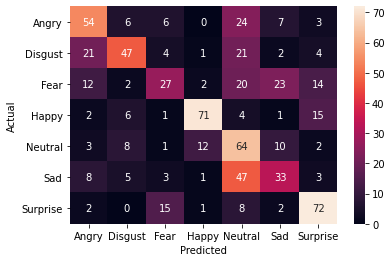

In [37]:
# Sample confusion matrix between true vs true.
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

data = {'y_Actual':   true_labels,
        'y_Predicted': predicted_labels
        }

# data = {'y_Actual':    [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0],
#         'y_Predicted': [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0]
#         }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True, fmt = ".0f")
plt.show()